# Approximating with Rectangles

In this notebook, we want to examine our work with approximating rectangles as a way to unlock a general method in area and volume problems.  First we want to recall our ideas of approximating with rectangles, and that to approximate the area under the curve 

$$y = x^2 \quad \text{or} \quad f(x)=x^2$$


with five rectangles between 

$$x=0 \quad \text{to} \quad x=5$$


We will look at this two ways, with rectangles built on the left side of the intervals and rectangles built on the right side.

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1=linspace(0,5,100)#x values for graph of f(x)
x2=linspace(0,5,6)#x values for graphs the rectangles
def f(x):
    return x**2

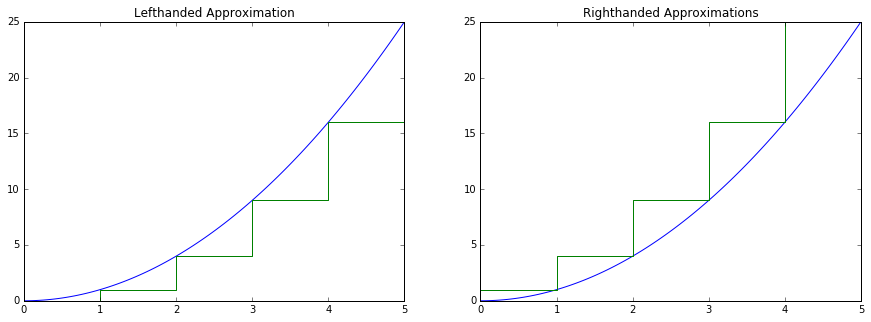

In [3]:
fig = plt.figure(figsize=(15, 5))
sub1 = fig.add_subplot(121)
sub1.plot(x1,f(x1))
sub1.step(x2+1,f(x2))
plt.xlim(0,5)
sub1.set_title('Lefthanded Approximation')
sub2 = fig.add_subplot(122)
sub2.plot(x1,f(x1))
sub2.step(x2,f(x2))
sub2.set_title('Righthanded Approximations')

### Computing the Approximations

The Lefthanded approximation has five rectangles, width 1, height starting at the first lefthanded interval $x=0$.

$$(1)f(0) + (1)f(1) + (1)f(2) + (1)f(3) + (1)f(4)$$

$$(1)(0^2) + (1)(1^2) + (1)(2^2) + (1)(3^2) + (1)(4^2)$$

The Righthanded approximation has five rectangles, width 1, height found starting at the first righthanded endpoint of an interval $x=1$.

$$(1)f(1) + (1)f(2) + (1)f(3) + (1)f(4) + (1)f(5)$$

$$(1)(1^2) + (1)(2^2) + (1)(3^2) + (1)(4^2) + (1)(5^2)$$


In [4]:
leftheights = [i**2 for i in range(0,5)]
leftheights

[0, 1, 4, 9, 16]

In [5]:
rightheights = [i**2 for i in range(1,6)]
rightheights

[1, 4, 9, 16, 25]

In [6]:
leftarea=(1)*(leftheights)
np.sum(leftarea)

30

In [7]:
rightarea=(1)*(rightheights)
np.sum(rightarea)

55

In [8]:
leftheights = [(i/2)**2 for i in range(0,10)]
leftheights

[0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25]

In [9]:
rightheights = [(i/2)**2 for i in range(1,11)]
rightheights

[0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0]

In [10]:
leftarea = (1/2)*(np.sum(leftheights))
leftarea

35.625

In [11]:
rightarea = (1/2)*(np.sum(rightheights))
rightarea

48.125

### User Input

We can make a small user input entry to change the assignment of the number of rectangles we are using, the left endpoint of the interval, and right endpoint of the interval.  These values can be stored and used in the approximations.  

In [12]:
n = int(input("How many rectangles would you like to use, "))
a = int(input("What's the left endpoint, "))
b = int(input("What's the right endpoint, "))

How many rectangles would you like to use, 10
What's the left endpoint, 0
What's the right endpoint, 3


In [13]:
width = (b-a)/float(n)
print('Your width is', width)

Your width is 0.3


#### Problem

Now use the above functions to ask users to input the left and right endpoints, how many rectangles, and will print the value of the area approximation.

### Adding more Rectangles

As we have seen, we improve our approximations by increasing the number of rectangles used in our approximations.

In [14]:
x1=linspace(-10,10,100)
x2=linspace(-10,10,30)
def f(x):
    return -x**2+1

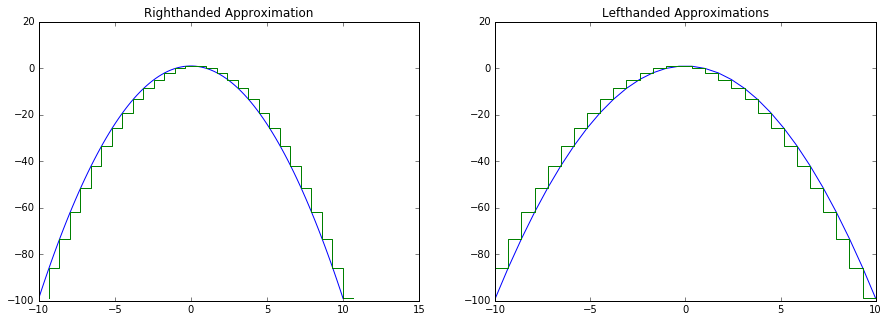

In [15]:
fig = plt.figure(figsize=(15, 5))
sub1 = fig.add_subplot(121)
sub1.plot(x1,f(x1))
sub1.step(x2+2/3,f(x2))
sub1.set_title('Righthanded Approximation')
sub2 = fig.add_subplot(122)
sub2.plot(x2,f(x2))
sub2.step(x2,f(x2))
sub2.set_title('Lefthanded Approximations')

### Improving our Approximations

Obviously, as we have seen, the approximations of the areas improve as the number of rectangles increases.  The width of each rectangle on an interval $[a,b]$ is given by

$$\frac{|b-a|}{n}$$ 

We can make a little program to ask the user to enter all the important information and then calculate the approximation.  First, we need the left endpoint, right endpoint, and the number of rectangles we are going to use.

In [16]:
a = int(input("What is the left endpoint "))
b = int(input("What is the right endpoint "))
n = int(input("How many rectangles do you want to use "))
width = (b-a)/float(n)
print('The width of one interval is ', width)

What is the left endpoint 0
What is the right endpoint 6
How many rectangles do you want to use 10
The width of one interval is  0.6


### Adding Heights 

Now we need to figure out how to list the places we want to find the different heights of the rectangles.  Recall that at each width we have to find the height.  If we have $n$ rectangles, we are finding the heights at every $i$ in $n$ for $\frac{| b-a |}{n}$ or:

$$f(a + i * width)$$

We just need to add asking for a function to evaluate, and to index a list.

In [17]:
def f(x):
    return x**2

In [22]:

a = int(input("What is the left endpoint "))
b = int(input("What is the right endpoint "))
n = int(input("How many rectangles do you want to use "))
width = (b-a)/float(n)
print('The width of one interval is ', width)
heights = [f(a+i*width) for i in range(n)]
#print('The heights are ', heights)
area = width * np.sum(heights)
print('The area is approximately ', area)




What is the left endpoint 0
What is the right endpoint 4
How many rectangles do you want to use 3000
The width of one interval is  0.0013333333333333333
The area is approximately  21.3226678519


#### Problem

1. Compute the following approximation for $y=x^2$ on `[0,5]`:

    a. With 10 rectangles constructed on the right endpoints of the subintervals.
    
    b. With 15 rectangles constructed on the left endpoints of the subintervals.
    


#### Trapezoid Approximations

There is a trapezoidal approximation function available, or we could easily revise the above algorithm to compute the areas of trapezoids as opposed to that of rectangles.  Copy and paste the code from above.  Alter the code to reflect the area of a trapezoid as opposed to that of the rectangle.

### Moving to the infinite case

As we see below, the approximations for our areas improve as we increase the number of rectangles.  As our reading on ibn Al Haytham discussed, the ideal case is to let the number of rectangles approach infinity.  We connected this idea to the later more rigorous formulation of George Bernhard Riemann and his definite integral.

$$\lim_{n \to \infty} \sum_{i=1}^n f(x_i) \Delta{x}$$

In symbols saying we want the number of rectangles to be infinitely large.   We can use the sympy commands here to evaluate these summations as well.  For example the summation to determine the area underneath $y=x^2$ from $x=0$ to $x=5$ is given by:

$$\sum_{i=1}^n (\frac{5}{n})f(\frac{5i}{n})$$

Which because $f(x)=x^2$: 

$$\sum_{i=1}^n (\frac{5}{n}) (\frac{5i}{n})^2$$

And because our summation is only dealing with things indexed with $i$:

$$\frac{5*25}{n^3} \sum_{i=1}^n {i^2} = \frac{5*25}{n^3} ( \frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})$$

### The Definite Integral

Now we have arrived at the definition of the definite integral.  Python's libraries have commands that allow us to carry out definite integrals on set boundaries quickly and easily.  Recall that we defined the definite integral with the notation:

$$\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^n f(x_i) \Delta{x}$$

In python, we use the `scipy.integrate` command. New here is using the lambda on the x, as well as that the output includes an approximation of the integral and an error term.  

In [19]:
from scipy import integrate
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)


(21.333333333333336, 2.368475785867001e-13)

In [20]:
x3 = lambda x: 1-x**2
integrate.quad(x3, -1,1)

(1.3333333333333335, 1.4802973661668755e-14)

In [21]:
paraboloid = lambda y: np.pi * (np.sqrt(1-y))**2
integrate.quad(paraboloid, -1, 1)

(6.283185307179586, 6.975736996017264e-14)